In [9]:
import numpy as np
import scipy.stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [10]:
data = pd.read_csv('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/hometask/sem2/yurchenko.aa@phystech.edu.csv', header = None)
data.head()

,0
0,1.376392
1,1.832296
2,1.738011
3,1.665702
4,1.453839


In [11]:
x = data[0].values
x.shape

(100,)

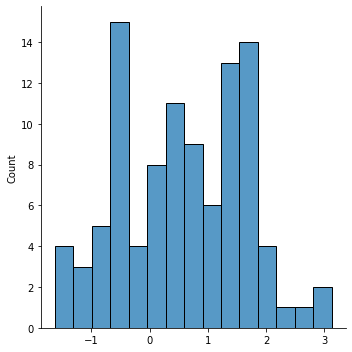

In [19]:
sns.displot(x,  bins=15)

In [12]:
print('mean = {:.2f}'.format(np.mean(x)))

mean = 0.57


In [13]:
print('variation = {:.2f}'.format(np.std(x, ddof = 1)))

variation = 1.07


Тест Харке - Бера вручную

In [20]:
n = len(x)
mean = np.mean(x)
std = np.std(x)
dx = x - mean
gamma1 = (np.sum(dx**3)/n) / (np.sum(dx**2)/n)**(3/2)
gamma2 = ((np.sum(dx**4)/n) / (np.sum(dx**2)/n)**2) - 3
T = n/6 * (gamma1**2 + 1/4 * gamma2**2)
p = 1 - st.chi2.cdf(T, 2)
print(p)

0.31965338268107857


Тест Харке - Бера из библиотеки

In [21]:
st.jarque_bera(x)

Jarque_beraResult(statistic=2.281036098744932, pvalue=0.31965338268107857)

Тест Шапиро - Уилка

In [23]:
st.shapiro(x)

ShapiroResult(statistic=0.9777519106864929, pvalue=0.08867823332548141)

In [24]:
binarized_x = (x >= 0).astype(int)

Сумма единиц в бинаризованной выборке

In [25]:
sum_ones = binarized_x.sum()
sum_ones

69

Биномиальный тест

In [26]:
p = st.binom_test((sum_ones, len(binarized_x) - sum_ones), p = 0.5, alternative = 'two-sided')
print('p = {:.5f}'.format(p))

p = 0.00018


In [27]:
st.binom_test(42, 100, p = 0.5, alternative = 'two-sided')

0.13321061920721386

Статистика для критерия отношения правдоподобий

In [28]:
L1 = st.bernoulli.pmf(binarized_x, p = 0.5).prod() 
L2 = st.bernoulli.pmf(binarized_x, p = sum_ones/len(binarized_x)).prod()
LR = -2 * np.log(L1/L2)
print('LR = {:.2f}'.format(LR))

LR = 14.81
